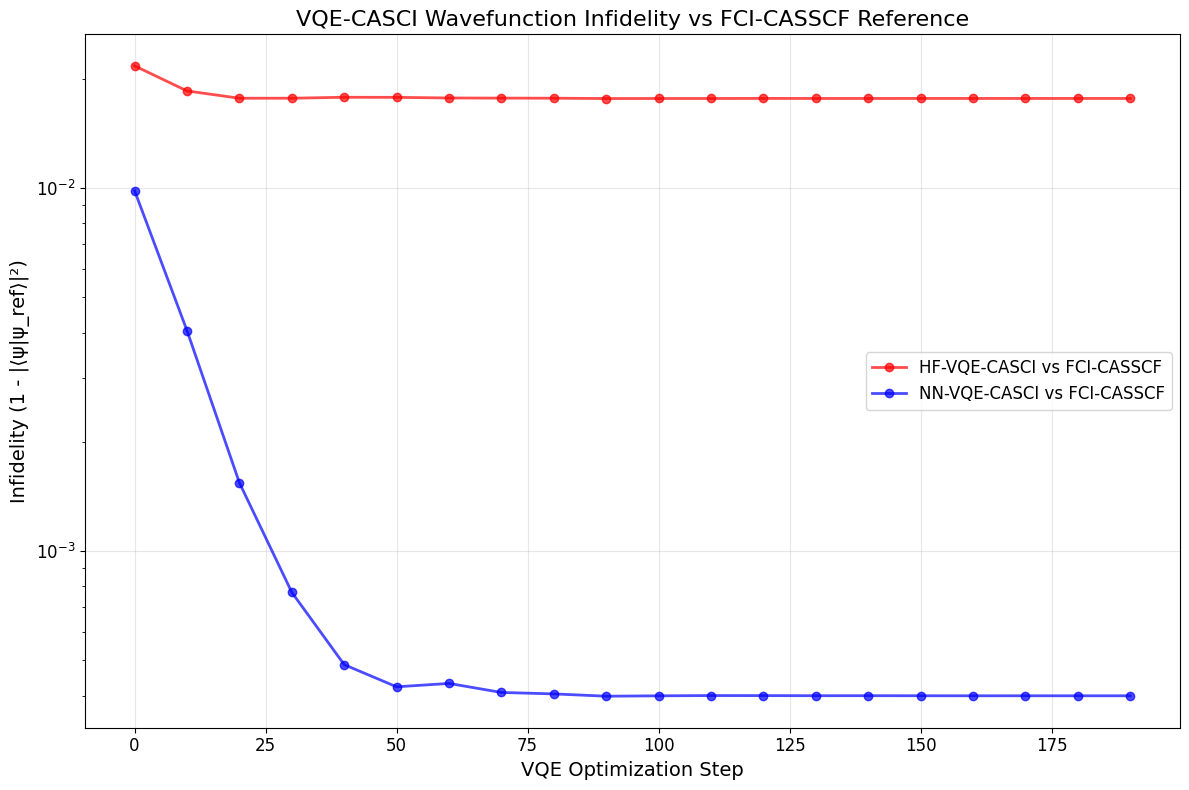


SUMMARY
FCI-CASSCF reference energy:  -2.15180426 Ha
HF-VQE-CASCI final energy:     -2.12351377 Ha
NN-VQE-CASCI final energy:     -2.15071730 Ha

Energy differences from FCI-CASSCF:
HF-VQE-CASCI: 28.290 mHa
NN-VQE-CASCI: 1.087 mHa

Final infidelities vs FCI-CASSCF:
HF-VQE-CASCI: 1.767769e-02
NN-VQE-CASCI: 3.993496e-04
Infidelity ratio (NN/HF): 0.02


In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

BOND_LENGTH = 0.7

def load_results(bond_length, results_dir="Data"):
    filename = f"{results_dir}/vqe_casci_results_bond({bond_length}).json"
    if Path(filename).exists():
        with open(filename, 'r') as f:
            return json.load(f)
    else:
        print(f"Results file not found: {filename}")
        print("Please run the VQE experiment first.")
        return None

def plot_figure_3(bond_length=BOND_LENGTH):
    # Load results
    results = load_results(bond_length)
    if results is None:
        return
    
    # Extract data
    steps = results['infidelity_history']['steps']
    infidelities_hf = results['infidelity_history']['hf']
    infidelities_nn = results['infidelity_history']['nn']
    
    # Create figure (same as original)
    plt.figure(figsize=(12, 8))
    
    plt.semilogy(steps, infidelities_hf, 'ro-', label='HF-VQE-CASCI vs FCI-CASSCF', 
                 alpha=0.7, linewidth=2, markersize=6)
    plt.semilogy(steps, infidelities_nn, 'bo-', label='NN-VQE-CASCI vs FCI-CASSCF', 
                 alpha=0.7, linewidth=2, markersize=6)
    
    plt.xlabel('VQE Optimization Step', fontsize=14)
    plt.ylabel('Infidelity (1 - |⟨ψ|ψ_ref⟩|²)', fontsize=14)
    plt.title('VQE-CASCI Wavefunction Infidelity vs FCI-CASSCF Reference', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    plt.tight_layout()
    plt.savefig(f'vqe_casci_infidelity_vs_fci_casscf({bond_length}).png', dpi=150)
    plt.show()
    
    # Print summary
    print("\n" + "="*60)
    print("SUMMARY")
    print("="*60)
    print(f"FCI-CASSCF reference energy:  {results['reference_energy']:.8f} Ha")
    print(f"HF-VQE-CASCI final energy:     {results['hf_vqe_casci_energy']:.8f} Ha")
    print(f"NN-VQE-CASCI final energy:     {results['nn_vqe_casci_energy']:.8f} Ha")
    print(f"\nEnergy differences from FCI-CASSCF:")
    print(f"HF-VQE-CASCI: {results['energy_diff_mHa']['hf']:.3f} mHa")
    print(f"NN-VQE-CASCI: {results['energy_diff_mHa']['nn']:.3f} mHa")
    print(f"\nFinal infidelities vs FCI-CASSCF:")
    print(f"HF-VQE-CASCI: {results['final_infidelities']['hf']:.6e}")
    print(f"NN-VQE-CASCI: {results['final_infidelities']['nn']:.6e}")
    
    if results['final_infidelities']['hf'] > 0:
        ratio = results['final_infidelities']['nn'] / results['final_infidelities']['hf']
        print(f"Infidelity ratio (NN/HF): {ratio:.2f}")

if __name__ == "__main__":
    plot_figure_3(bond_length=BOND_LENGTH)  # Change bond length as needed